In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import skrf as rf

1.3449714285714283
2.903999999999996


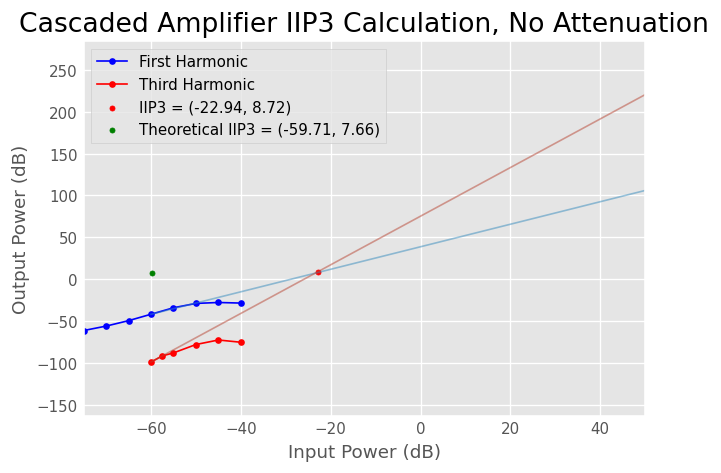

In [64]:
## 3d - Defining IIP1, IIP2, IIP3

# ## IIP1
in_pow_3d_iip1 = [-75, -70, -65, -60, -55, -50, -45, -40]
out_pow_3d_iip1 = [-61.3, -56, -49.5, -41.83, -34.1,-28.9,-27.8,-28.5]

plt.plot(in_pow_3d_iip1, out_pow_3d_iip1, 'bo-', label="First Harmonic")

## IIP3
in_pow_3d_iip3 = [-60, -57.5, -55, -50, -45, -40]
out_pow_3d_iip3 = [-98.9, -91.64,-88,-78,-72.6,-75.3]

plt.plot(in_pow_3d_iip3, out_pow_3d_iip3, 'ro-', label="Third Harmonic")

# ## Getting Polyfits for the IIPx Values
limit_iip1=6
[slp_3d_1, ic_3d_1] = np.polyfit(in_pow_3d_iip1[:limit_iip1], out_pow_3d_iip1[:limit_iip1],1)

limit_iip3=2
[slp_3d_3, ic_3d_3] = np.polyfit(in_pow_3d_iip3[:limit_iip3], out_pow_3d_iip3[:limit_iip3],1)

points = np.linspace(-60, 50, 100000)
polyfit_3d_iip1 = [ic_3d_1 + slp_3d_1*p for p in points]
polyfit_3d_iip3 = [ic_3d_3 + slp_3d_3*p for p in points]

plt.plot(points, polyfit_3d_iip1, alpha=0.5)
plt.plot(points, polyfit_3d_iip3, alpha=0.5)

x_val_3d = (out_pow_3d_iip1[0] - slp_3d_1*in_pow_3d_iip1[0] - (out_pow_3d_iip3[0] - slp_3d_3*in_pow_3d_iip3[0]))/(slp_3d_3-slp_3d_1)
y_val_3d = ic_3d_3 + slp_3d_3*x_val_3d
plt.scatter(x_val_3d, y_val_3d, c='red', label=f"IIP3 = ({x_val_3d:.2f}, {y_val_3d:.2f})")

plt.scatter(-59.71, 7.66, c='green', label=f"Theoretical IIP3 = ({-59.71:.2f}, {7.66:.2f})")

plt.title("Cascaded Amplifier IIP3 Calculation, No Attenuation")
plt.xlabel("Input Power (dB)")
plt.ylabel("Output Power (dB)")
plt.legend()

print(slp_3d_1)
print(slp_3d_3)

1.3449714285714283
2.903999999999996


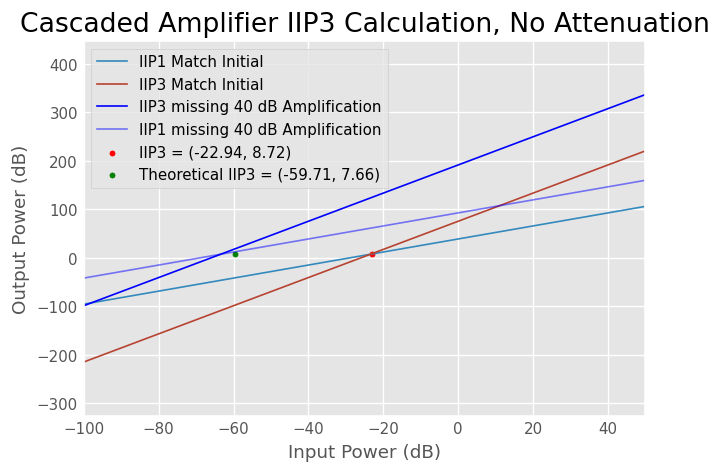

In [77]:
## 3d - Defining IIP1, IIP2, IIP3

# ## IIP1
in_pow_3d_iip1 = [-75, -70, -65, -60, -55, -50, -45, -40]
out_pow_3d_iip1 = [-61.3, -56, -49.5, -41.83, -34.1,-28.9,-27.8,-28.5]

# plt.plot(in_pow_3d_iip1, out_pow_3d_iip1, 'bo-', label="First Harmonic")

## IIP3
in_pow_3d_iip3 = [-60, -57.5, -55, -50, -45, -40]
out_pow_3d_iip3 = [-98.9, -91.64,-88,-78,-72.6,-75.3]

# plt.plot(in_pow_3d_iip3, out_pow_3d_iip3, 'ro-', label="Third Harmonic")

# ## Getting Polyfits for the IIPx Values
limit_iip1=6
[slp_3d_1, ic_3d_1] = np.polyfit(in_pow_3d_iip1[:limit_iip1], out_pow_3d_iip1[:limit_iip1],1)

limit_iip3=2
[slp_3d_3, ic_3d_3] = np.polyfit(in_pow_3d_iip3[:limit_iip3], out_pow_3d_iip3[:limit_iip3],1)

points = np.linspace(-100, 50, 100000)
polyfit_3d_iip1 = [ic_3d_1 + slp_3d_1*p for p in points]
polyfit_3d_iip3 = [ic_3d_3 + slp_3d_3*p for p in points]

polyfit_40dB_fixed_iip3 = [ic_3d_3 + slp_3d_3*(p+40) for p in points]
polyfit_40dB_fixed_iip1 = [ic_3d_1 + slp_3d_1*(p+40) for p in points]


plt.plot(points, polyfit_3d_iip1, label="IIP1 Match Initial")
plt.plot(points, polyfit_3d_iip3, label="IIP3 Match Initial")


plt.plot(points, polyfit_40dB_fixed_iip3, 'b', label="IIP3 missing 40 dB Amplification")
plt.plot(points, polyfit_40dB_fixed_iip1, 'b', alpha=0.5, label="IIP1 missing 40 dB Amplification")


x_val_3d = (out_pow_3d_iip1[0] - slp_3d_1*in_pow_3d_iip1[0] - (out_pow_3d_iip3[0] - slp_3d_3*in_pow_3d_iip3[0]))/(slp_3d_3-slp_3d_1)
y_val_3d = ic_3d_3 + slp_3d_3*x_val_3d
plt.scatter(x_val_3d, y_val_3d, c='red', label=f"IIP3 = ({x_val_3d:.2f}, {y_val_3d:.2f})")

plt.scatter(-59.71, 7.66, c='green', label=f"Theoretical IIP3 = ({-59.71:.2f}, {7.66:.2f})")

plt.title("Cascaded Amplifier IIP3 Calculation, No Attenuation")
plt.xlabel("Input Power (dB)")
plt.ylabel("Output Power (dB)")
plt.legend()

print(slp_3d_1)
print(slp_3d_3)

0
20
40
60
80
90
100
120
140
160
180
200
220
240
260
270
280
300
320
340
-80.01544032546032


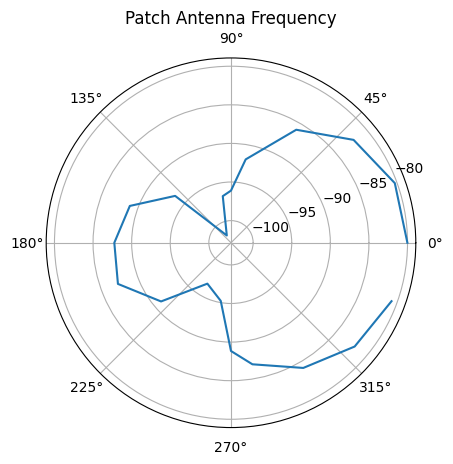

In [4]:
## Plotting Antenna Radiation Pattern

filenames = []
networks = []

s21_data = []

points=[0,20,40,60,80,90,100,120,140,160,180,200,220,240,260,270,280,300,320,340]

for i in points:
    # we're looking at txt files first
    print(i)
    filenames = 'DP2/DP2_radar/' + f"{i}.S1P"
    networks.append(rf.Network(filenames))

for net in networks:
    # print(net['2100.5Mhz'].s_db[0])
    s21_v = net['2276Mhz'].s_db[0][0][0]
    s21_data.append(s21_v)
    
g_tx = 4.55 # dBm
l_val = 3e8/(2276e6) # meters
D_val = 1.4478 # meters
air_loss = 20 * np.log10(l_val / (4 * np.pi * D_val))

g_rx = []
air_loss = -20 * np.log10(3e8/2276e6 / ( 4 * np.pi * 3))

for s21 in s21_data:
    val = s21 - g_tx - air_loss
    g_rx.append(val)

#  plot
ax = plt.subplot(111, polar=True)

# set zero west
# let set an azimuth for example, pi
angles = [p * 2 * np.pi / 360 for p in points]
plt.plot(angles, g_rx)
plt.title("Patch Antenna Frequency")

print(max(g_rx))

Text(0.5, 1.0, 'Patch Antenna Frequency')

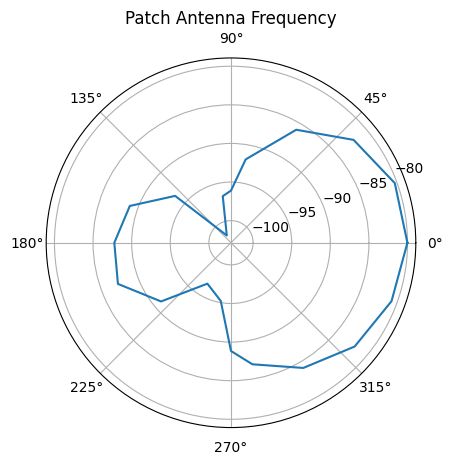

In [6]:

ax = plt.subplot(111, polar=True)

full_angles = angles
full_angles.append(0)

full_g_rx = g_rx
full_g_rx.append(g_rx[0])

plt.plot(full_angles, full_g_rx)
plt.title("Patch Antenna Frequency")

In [33]:
def get_polar_plot(freq_Mhz):
    filenames = []
    networks = []
    
    s21_data = []
    
    points=[0,20,40,60,80,90,100,120,140,160,180,200,220,240,260,270,280,300,320,340]
    
    for i in points:
        # we're looking at txt files first
        filenames = 'DP2/DP2_radar/' + f"{i}.S1P"
        networks.append(rf.Network(filenames))
    
    for net in networks:
        # print(net['2100.5Mhz'].s_db[0])
        s21_v = net[f'{freq_Mhz}Mhz'].s_db[0][0][0]
        s21_data.append(s21_v)
        
    g_tx = 4.55 # dBm
    l_val = 3e8/(freq_Mhz * 1e6) # meters
    D_val = 1.4478 # meters
    air_loss = 20 * np.log10(l_val / (4 * np.pi * D_val))
    
    g_rx = []
    
    for s21 in s21_data:
        val = s21 - g_tx - air_loss
        g_rx.append(val)
    
    #  plot
    ax = plt.subplot(111, polar=True)
    
    # set zero west
    # let set an azimuth for example, pi
    angles = [p * 2 * np.pi / 360 for p in points]

    full_angles = angles
    full_angles.append(0)
    
    full_g_rx = g_rx
    full_g_rx.append(g_rx[0])
    
    plt.plot(full_angles, full_g_rx)
    plt.title(f"Patch Antenna Gain at {freq_Mhz} MHz")

    print(f"Gain at 0º: {full_g_rx[0]}")

Gain at 0º: 9.16237035607623


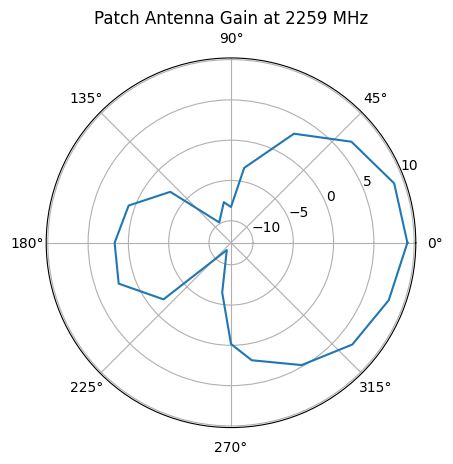

In [34]:
## calculate the gain for each frequency

get_polar_plot(2259)

Gain at 0º: 3.41102431543262


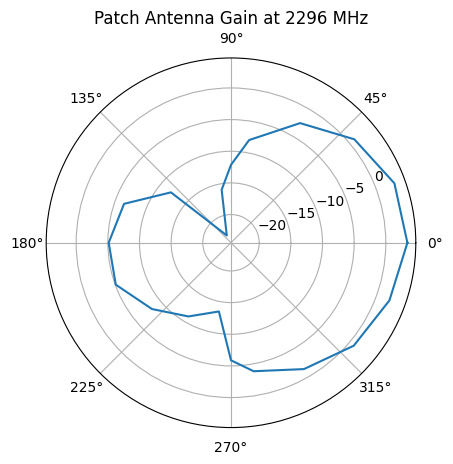

In [35]:
get_polar_plot(2296)

Gain at 0º: -18.07646004101929


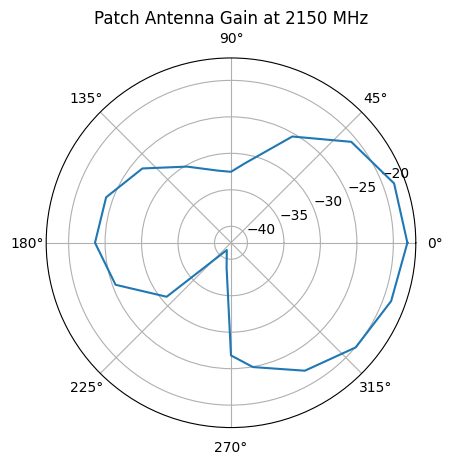

In [36]:
get_polar_plot(2150)

Gain at 0º: 5.59526231726808


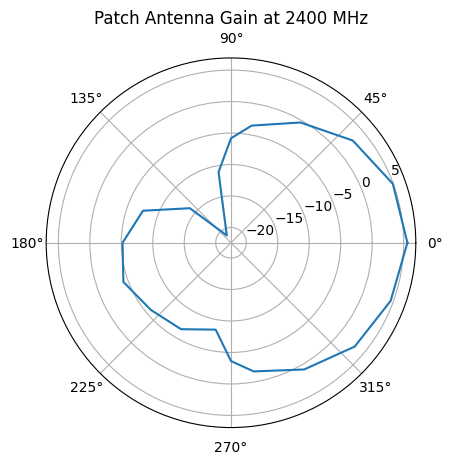

In [37]:
get_polar_plot(2400)

2.150 GHz -3.424920759862556
2.256 GHz 0.5410772123985823
2.276 GHz 0.385001814346922
2.296 GHz -5.512761988960672
2.400 GHz -7.368263617985588


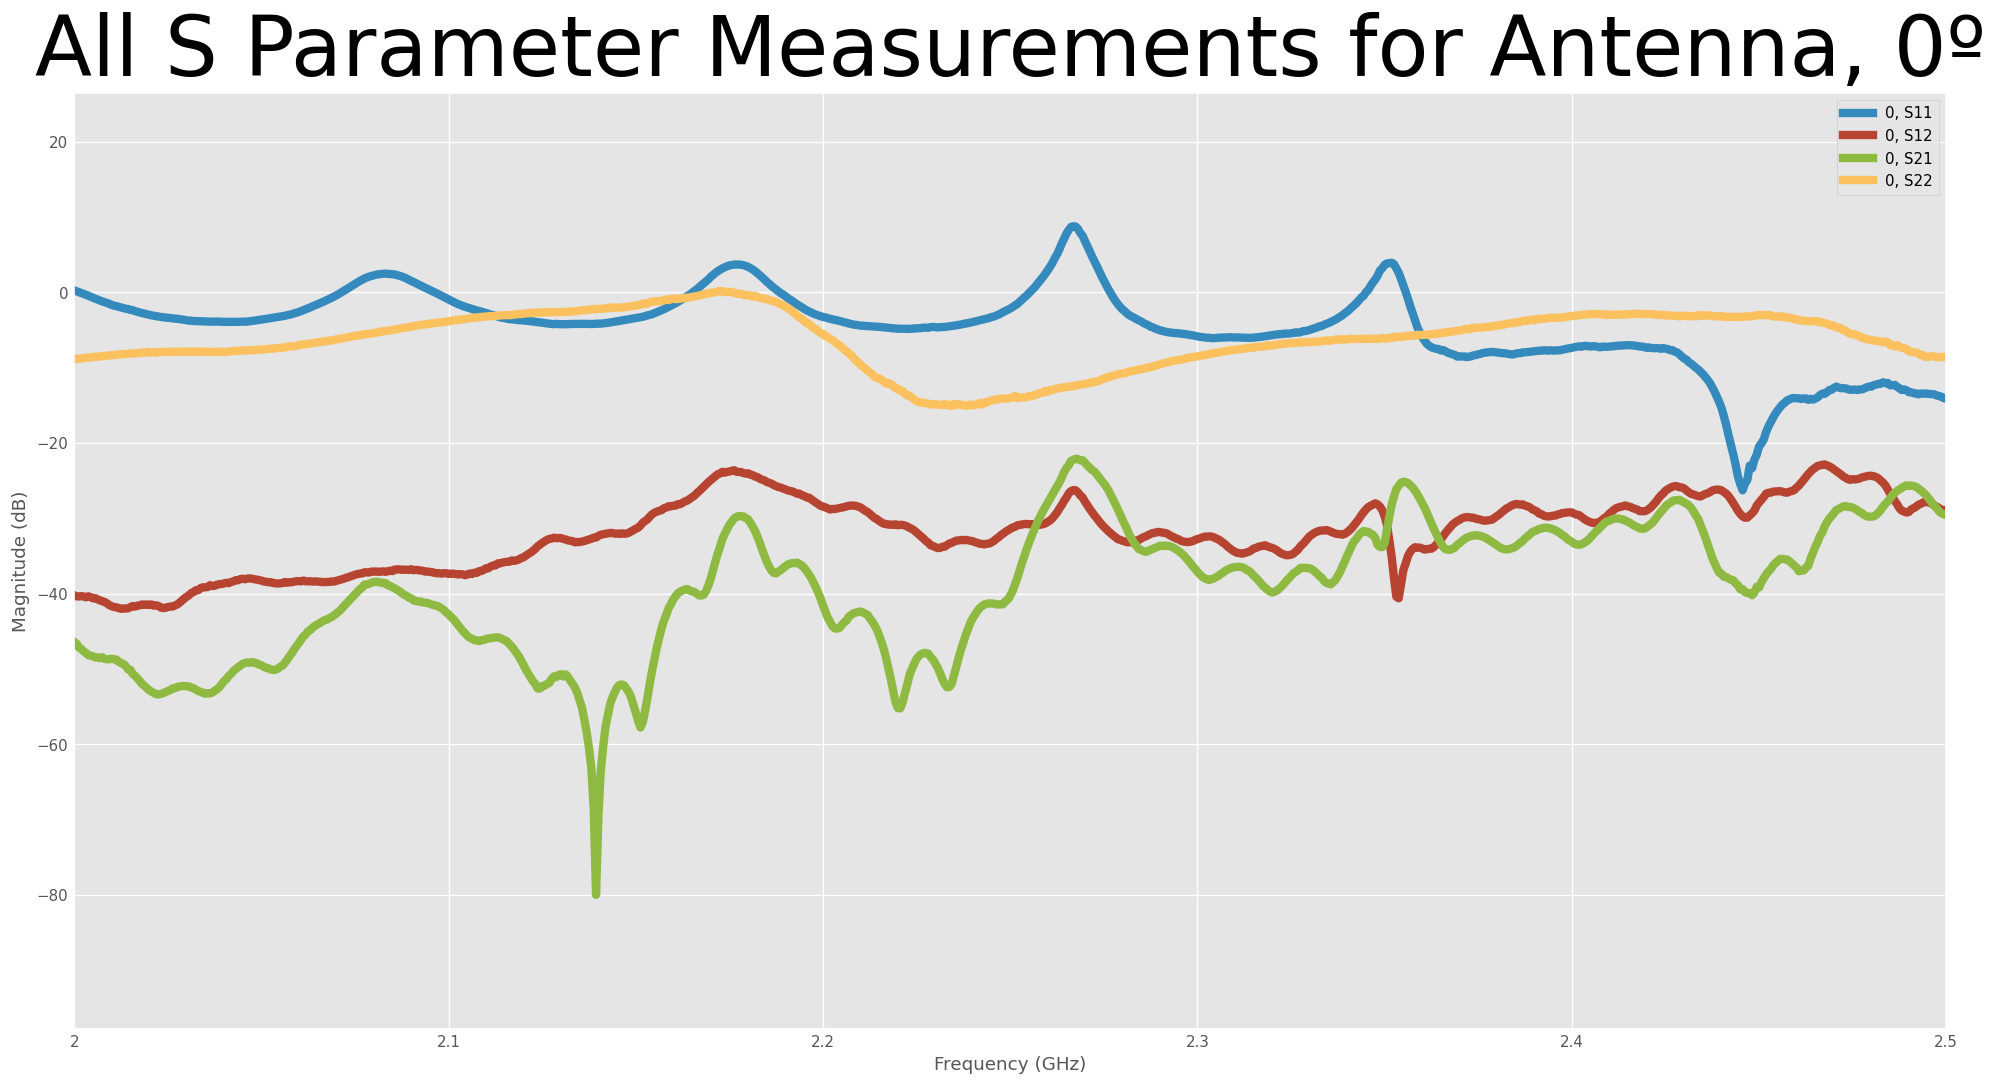

In [54]:
## Graph all S values

filename = 'DP2/DP2_radar/0.S2P'
network = rf.Network(filename)

fig, axs = plt.subplots(1, 1, figsize=(20, 10))
rf.stylely()
network.plot_s_db(lw=5, axis=axs)
axs.set_title("All S Parameter Measurements for Antenna, 0º", fontsize=50)

print(f"2.150 GHz {network['2150MHz'].s11.s_db[0][0][0]}")
print(f"2.256 GHz {network['2256MHz'].s11.s_db[0][0][0]}")
print(f"2.276 GHz {network['2276MHz'].s11.s_db[0][0][0]}")
print(f"2.296 GHz {network['2296MHz'].s11.s_db[0][0][0]}")
print(f"2.400 GHz {network['2400MHz'].s11.s_db[0][0][0]}")
